[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Classification Report:
               precision    recall  f1-score   support

   Acceptance       1.00      0.50      0.67         2
  Ambivalence       1.00      1.00      1.00         1
          Awe       0.00      0.00      0.00         2
          Bad       0.00      0.00      0.00         1
     Betrayal       0.00      0.00      0.00         1
   Bitterness       0.00      0.00      0.00         1
    Confusion       0.00      0.00      0.00         2
  Contentment       1.00      0.25      0.40         4
    Curiosity       1.00      0.67      0.80         3
      Despair       1.00      0.50      0.67         2
Determination       0.00      0.00      0.00         1
      Disgust       0.00      0.00      0.00         1
      Elation       0.00      0.00      0.00         2
  Embarrassed       0.00      0.00      0.00         2
  Empowerment       0.00      0.00      0.00         1
   Enthusiasm       0.00      0.00      0.00         1
     Euphoria       0.00      0.00      

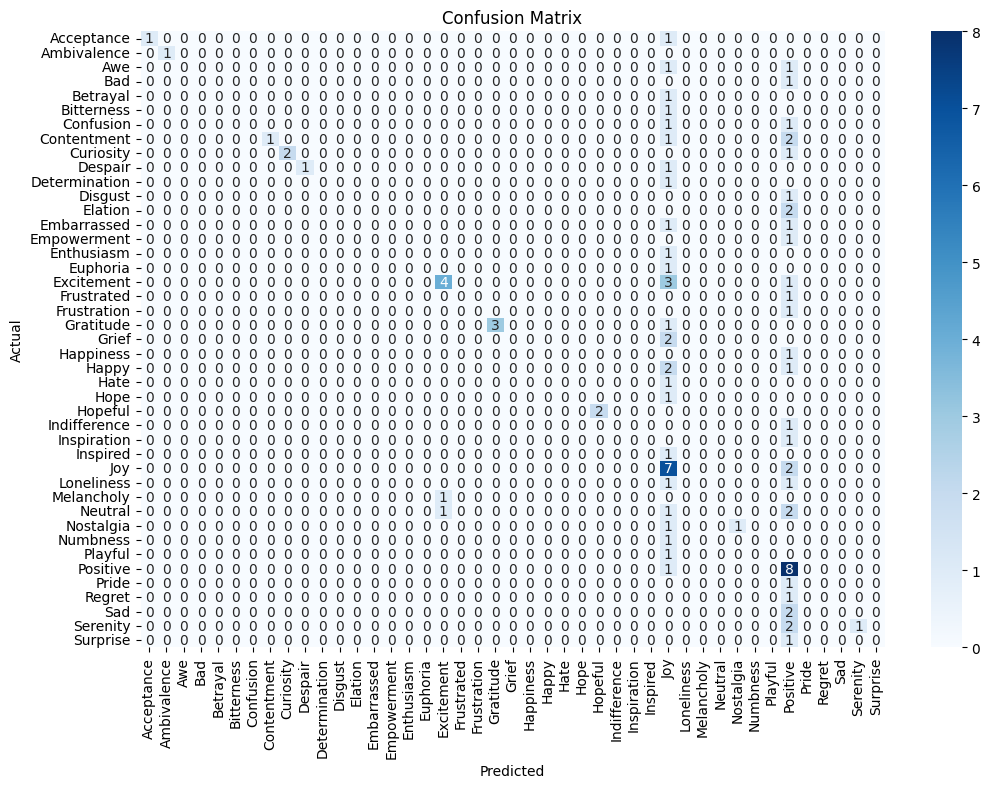


Sample Prediction: Positive


In [1]:
# Install necessary libraries if running in a fresh notebook
!pip install nltk scikit-learn pandas matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
df = pd.read_csv('sentimentdataset.csv')

# Drop unnecessary columns
df = df[['Text', 'Sentiment']]

# Clean whitespace in Sentiment column
df['Sentiment'] = df['Sentiment'].str.strip()

# Filter out rare sentiments (less than 5 occurrences)
sentiment_counts = df['Sentiment'].value_counts()
df = df[df['Sentiment'].isin(sentiment_counts[sentiment_counts >= 5].index)]

# Preprocess text function
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # remove links
    text = re.sub(r'\@w+|\#', '', text)  # remove @ and hashtags symbols
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuations and numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(tokens)

# Apply preprocessing
df['Clean_Text'] = df['Text'].apply(preprocess_text)

# Features and labels
X = df['Clean_Text']
y = df['Sentiment']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Sample Prediction
sample_text = ["I am very happy and excited about the weekend!"]
sample_text_clean = [preprocess_text(t) for t in sample_text]
sample_vec = vectorizer.transform(sample_text_clean)
prediction = model.predict(sample_vec)
print(f"\nSample Prediction: {prediction[0]}")
